In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [2]:
cs2_odds_df = pd.read_pickle("dataframes/polished_mainframe.pkl")
cs2_odds_df = cs2_odds_df.astype(float)

# split off results before normalization
cs2_odds_df_results = cs2_odds_df['total_kills']

# Split results between training, dev, and test
cs2_odds_df_training_results = cs2_odds_df_results.head((len(cs2_odds_df.index) * 7) // 10)
cs2_odds_df_dev_results = cs2_odds_df_results.iloc[((len(cs2_odds_df.index) * 7) // 10):((len(cs2_odds_df.index) * 9) // 10) - 1]
cs2_odds_df_test_results = cs2_odds_df_results.tail((len(cs2_odds_df.index) * 1) // 10)

# Assume df is your original DataFrame
cs2_odds_df = cs2_odds_df['kills_per_round']

In [3]:
print(cs2_odds_df)

# Split data between training, dev, and test
cs2_odds_df_training = cs2_odds_df.head((len(cs2_odds_df.index) * 7) // 10)
cs2_odds_df_dev = cs2_odds_df.iloc[((len(cs2_odds_df.index) * 7) // 10):((len(cs2_odds_df.index) * 9) // 10) - 1]
cs2_odds_df_test = cs2_odds_df.tail((len(cs2_odds_df.index) * 1) // 10)

215    0.72
140    0.67
182    0.77
66     0.59
43     0.68
       ... 
155    0.68
41     0.66
170    0.74
168    0.62
128    0.72
Name: kills_per_round, Length: 3004, dtype: float64


In [4]:
# Split off results
cs2_odds_df_training_results = cs2_odds_df_training_results.values.ravel()
cs2_odds_df_dev_results = cs2_odds_df_dev_results.values.ravel()
cs2_odds_df_test_results = cs2_odds_df_test_results.values.ravel()

In [5]:
# Our Baseline Model RMSE for dev set
y_predicted = cs2_odds_df_dev.values.ravel() * 44
rmse = np.sqrt(mean_squared_error(cs2_odds_df_dev_results, y_predicted))
print(f'Baseline model dev RMSE: {rmse}')

Baseline model dev RMSE: 8.25146855616219


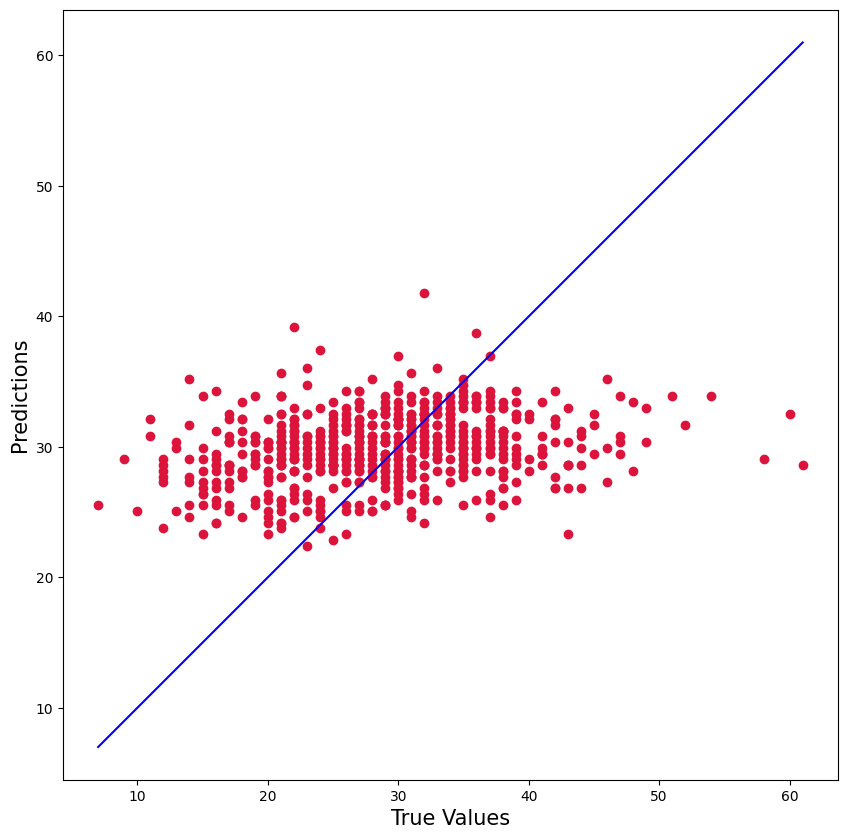

In [6]:
# Our predicted vs true values plot for the baseline model
plt.figure(figsize=(10,10))
plt.scatter(cs2_odds_df_dev_results, y_predicted, c='crimson')
p1 = max(max(y_predicted), max(cs2_odds_df_dev_results))
p2 = min(min(y_predicted), min(cs2_odds_df_dev_results))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [7]:
# Our Baseline Model RMSE for test set
y_predicted = cs2_odds_df_test.values.ravel() * 44
rmse = np.sqrt(mean_squared_error(cs2_odds_df_test_results, y_predicted))
print(f'Baseline model test RMSE: {rmse}')

Baseline model test RMSE: 8.201155690917389


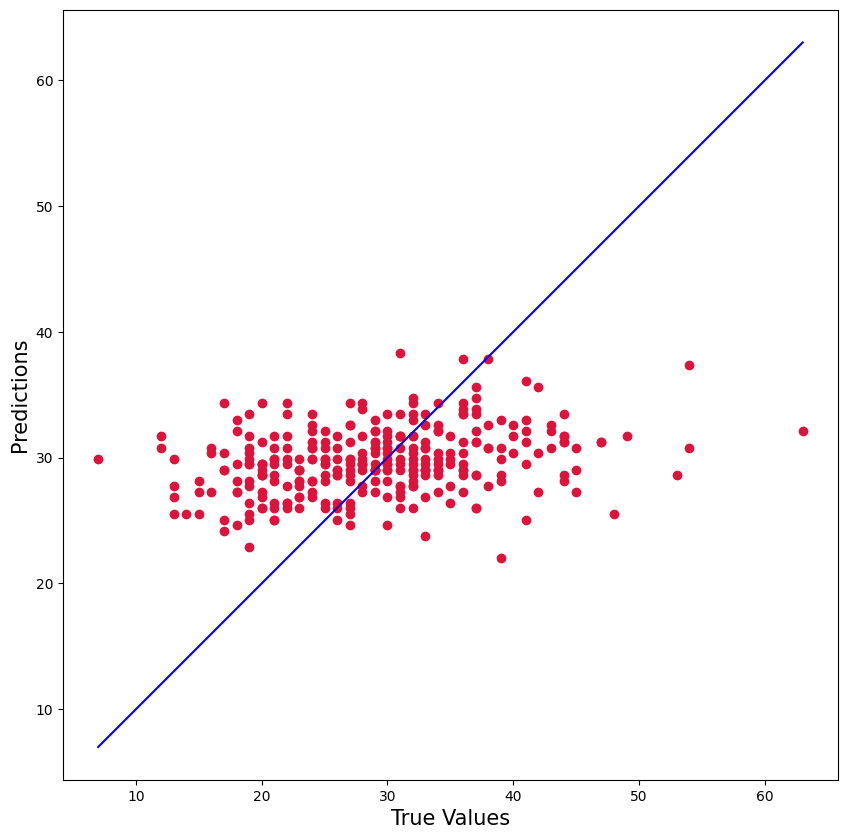

In [8]:
# Our predicted vs true values plot for the baseline model
plt.figure(figsize=(10,10))
plt.scatter(cs2_odds_df_test_results, y_predicted, c='crimson')
p1 = max(max(y_predicted), max(cs2_odds_df_test_results))
p2 = min(min(y_predicted), min(cs2_odds_df_test_results))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()